In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from ecephys.data import paths
from ecephys.sglx_utils import load_timeseries, load_multifile_timeseries

In [5]:
bin_paths = paths.get_sglx_style_datapaths("Eugene", "extended-wake", "lf.bin")

In [219]:
all_da = [load_timeseries(path, chans=[0], start_time=None, end_time=None, datetime=True, xarray=True) for path in bin_paths]

nChan: 385, nFileSamp: 800217
nChan: 385, nFileSamp: 2877424
nChan: 385, nFileSamp: 2430722
nChan: 385, nFileSamp: 5735230
nChan: 385, nFileSamp: 9000025
nChan: 385, nFileSamp: 5608943
nChan: 385, nFileSamp: 2417612
nChan: 385, nFileSamp: 3435368
nChan: 385, nFileSamp: 1369314
nChan: 385, nFileSamp: 9000025
nChan: 385, nFileSamp: 2946948


In [212]:
da = xr.concat(all_da, dim="time")

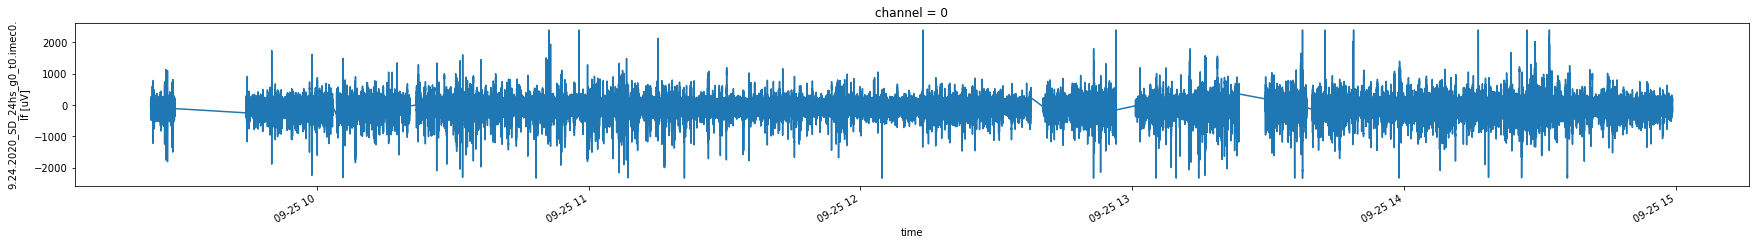

In [215]:
da.plot(x="time", aspect=10, size=3)

In [7]:
time, sig, fs = load_multifile_timeseries(bin_paths[0:3], chans=[0], datetime=False, xarray=False)

nChan: 385, nFileSamp: 800217
nChan: 385, nFileSamp: 2877424
nChan: 385, nFileSamp: 2430722
You are loading multifile SGLX data without xarray.
 Are you sure you want to do this? Please see documentation.


In [15]:
bin_paths = paths.get_sglx_style_datapaths("Alessandro", "recovery-sleep", "lf.bin")

In [16]:
spw_paths = paths.get_sglx_style_datapaths("Alessandro", "recovery-sleep", "spws.h5")

In [17]:
bin_paths

[PosixPath('/Volumes/neuropixel_archive/Data/chronic/CNPIX5-Alessandro/raw/8-25-2020_g0/8-25-2020_g0_imec0/8-25-2020_g0_t2.imec0.lf.bin'),
 PosixPath('/Volumes/neuropixel_archive/Data/chronic/CNPIX5-Alessandro/raw/8-25-2020_g0/8-25-2020_g0_imec0/8-25-2020_g0_t3.imec0.lf.bin')]

In [18]:
spw_paths

[PosixPath('/Volumes/neuropixel/Data/CNPIX5-Alessandro/8-25-2020_g0/8-25-2020_g0_imec0/8-25-2020_g0_t2.imec0.spws.h5'),
 PosixPath('/Volumes/neuropixel/Data/CNPIX5-Alessandro/8-25-2020_g0/8-25-2020_g0_imec0/8-25-2020_g0_t3.imec0.spws.h5')]

In [19]:
[i for i in zip(bin_paths, spw_paths)]

[(PosixPath('/Volumes/neuropixel_archive/Data/chronic/CNPIX5-Alessandro/raw/8-25-2020_g0/8-25-2020_g0_imec0/8-25-2020_g0_t2.imec0.lf.bin'),
  PosixPath('/Volumes/neuropixel/Data/CNPIX5-Alessandro/8-25-2020_g0/8-25-2020_g0_imec0/8-25-2020_g0_t2.imec0.spws.h5')),
 (PosixPath('/Volumes/neuropixel_archive/Data/chronic/CNPIX5-Alessandro/raw/8-25-2020_g0/8-25-2020_g0_imec0/8-25-2020_g0_t3.imec0.lf.bin'),
  PosixPath('/Volumes/neuropixel/Data/CNPIX5-Alessandro/8-25-2020_g0/8-25-2020_g0_imec0/8-25-2020_g0_t3.imec0.spws.h5'))]

In [22]:
from datetime import datetime 

for bin_path in bin_paths:
    current_time = datetime.now().strftime("%H:%M:%S")
    print(f"{current_time}: Finished {str(bin_path)}")

15:48:06: Finished /Volumes/neuropixel_archive/Data/chronic/CNPIX5-Alessandro/raw/8-25-2020_g0/8-25-2020_g0_imec0/8-25-2020_g0_t2.imec0.lf.bin
15:48:06: Finished /Volumes/neuropixel_archive/Data/chronic/CNPIX5-Alessandro/raw/8-25-2020_g0/8-25-2020_g0_imec0/8-25-2020_g0_t3.imec0.lf.bin


In [23]:
params_path = paths.get_datapath(subject="Alessandro", condition="sleep-homeostasis", file="sharp_wave_detection_params.json")


In [27]:
params_path.parent.mkdir(parents=True, exist_ok=True)